In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [102]:
diabetes=pd.read_csv('diabetes.csv')

In [103]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [104]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [105]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [106]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [107]:
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [108]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols_with_zero]=diabetes[cols_with_zero].replace(0,np.nan)

In [109]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [110]:
diabetes.isnull().sum() / diabetes.shape[0]*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

3. Handling the missing Values

In [111]:
np.round(diabetes['Insulin'].mean())

np.float64(156.0)

In [112]:
diabetes['Insulin'].fillna(np.round(diabetes['Insulin'].mean()),inplace=True)

In [113]:
from sklearn.impute import SimpleImputer
#strategy - 'mean','median','most_frequent','constant'
impute=SimpleImputer(strategy='median')
impute.fit(diabetes)

SimpleImputer(strategy='median')

In [114]:
diabetes_array=impute.transform(diabetes)

In [115]:
diabetes_df=pd.DataFrame(diabetes_array,columns=diabetes.columns)

4. Is there Imbalanced Class?

In [116]:
X=diabetes_df.drop('Outcome',axis=1)
Y=diabetes_df['Outcome']

In [117]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
transform_feature,transform_label=oversample.fit_resample(X,Y)

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

6. Data Preprocessing

In [119]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(transform_feature)

In [120]:
x_train_scaler

array([[ 0.53949964,  0.67382626, -0.10963898, ...,  0.09118973,
         0.40948348,  1.37226463],
       [-0.93115594, -1.32430303, -0.62922019, ..., -0.97548337,
        -0.44010557, -0.28069091],
       [ 1.12776187,  1.78389808, -0.80241393, ..., -1.47834355,
         0.54800344, -0.19369325],
       ...,
       [ 0.31252249, -0.30040036,  0.27629089, ..., -0.39977352,
        -0.30871018,  0.94959217],
       [-0.27008637,  1.40785325,  0.47424915, ...,  0.22728109,
         1.24624892, -0.30222575],
       [-0.0531724 , -0.11896331, -0.97301104, ..., -0.15524856,
        -0.82456016,  0.06762581]])

In [121]:
x_train_scaler=scaler.transform(x_test)

6. Logistic regression

In [122]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [123]:
model.score(x_train_scaler,y_test)

0.6948051948051948

7. ML pipeline

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')

2. read dataset

In [156]:
diabetes=pd.read_csv('diabetes.csv')

In [157]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols_with_zero]=diabetes[cols_with_zero].replace(0,np.nan)

In [158]:
X=diabetes.drop('Outcome',axis=1)
Y=diabetes['Outcome']

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [160]:
numeric_features=X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # Step 1: Fill missing values with median
    ('scaler', StandardScaler())                     # Step 2: Standardize (mean=0, std=1)
])


In [161]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features)
    ])

In [162]:
#model_pipeline=Pipeline(steps=[
    #('preprocessor',preprocessor),
    #('smote',SMOTE()),
    #('classifier',LogisticRegression(solver='liblinear',max_iter=10000,penalty='l2'))
#])

In [164]:
from imblearn.pipeline import Pipeline  # <-- use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess features
    ('smote', SMOTE()),              # Apply SMOTE to balance classes
    ('classifier', LogisticRegression(
        solver='liblinear',
        max_iter=10000,
        penalty='l2'
    ))  # Train Logistic Regression
])


In [165]:
#run pipeline
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('classifier',
                 LogisticRegression(max_iter=10000, solver='liblinear'))])

In [149]:
y_pred=model_pipeline.predict(x_test)

In [150]:
model_pipeline.score(x_test,y_test)

0.8116883116883117

In [151]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



<Axes: >

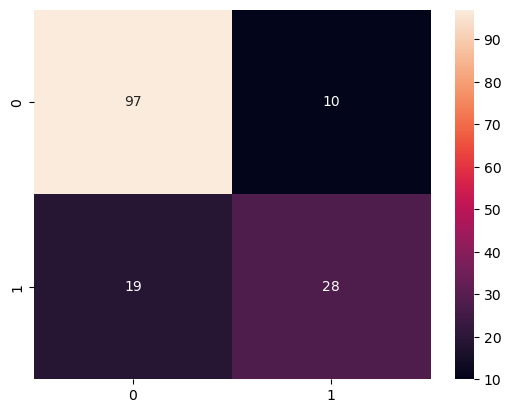

In [166]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f')